In [1]:
install.packages("data.table")

Installing package into ‘/home/student/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


## Description
- Récupérer les simulations et les acoller en une seule grande trajectoire
- Ajouter _'new trajec'_ = 1 si l'on commence une nouvelle trajectoire
- _'cum mean'_ est la moyenne cumulée sur une trajectoire. Au temps _t_ c'est la moyenne des _(t-1)_ valeurs précédentes de la trajectoire
- Y détermine l'arrivée d'un acciddent par le critère suivant : |X-cum_mean| > seuil1 OU |X-X0| > seuil2

In [2]:
# Load data

load("out_O2.RData")
out_O2 = data.frame(out_O2)

nb_simu = length(out_O2)
nb_t = length(out_O2[['X1']])
print(nb_t)
print(nb_simu)

head(out_O2)

[1] 41
[1] 100


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
0,0.004203003,0.004339162,0.004097421,0.003987734,0.004235583,0.004195881,0.004004151,0.004336311,0.004359338,0.004188920,⋯,0.004373223,0.004133136,0.004392692,0.004006871,0.004170721,0.004417309,0.004120721,0.004341654,0.004221585,0.004269317
1,0.004204104,0.004338627,0.004099708,0.003991178,0.004236304,0.004197064,0.004007426,0.004335811,0.004358551,0.004190184,⋯,0.004372260,0.004135030,0.004391481,0.004010119,0.004172192,0.004415780,0.004122753,0.004341089,0.004222470,0.004269637
2,0.004204978,0.004338131,0.004101568,0.003993995,0.004236860,0.004198007,0.004010105,0.004335345,0.004357842,0.004191193,⋯,0.004371404,0.004136564,0.004390416,0.004012774,0.004173374,0.004414448,0.004124401,0.004340566,0.004223164,0.004269857
3,0.004205707,0.004337716,0.004103118,0.003996335,0.004237325,0.004198793,0.004012331,0.004334955,0.004357249,0.004192035,⋯,0.004370687,0.004137843,0.004389524,0.004014981,0.004174361,0.004413331,0.004125774,0.004340130,0.004223743,0.004270041
4,0.004206353,0.004337409,0.004104445,0.003998316,0.004237751,0.004199487,0.004014217,0.004334669,0.004356793,0.004192776,⋯,0.004370128,0.004138945,0.004388817,0.004016852,0.004175221,0.004412436,0.004126955,0.004339804,0.004224264,0.004270234
5,0.004206912,0.004337172,0.004105569,0.003999983,0.004238126,0.004200086,0.004015806,0.004334450,0.004356432,0.004193412,⋯,0.004369680,0.004139884,0.004388247,0.004018427,0.004175957,0.004411708,0.004127959,0.004339552,0.004224719,0.004270415


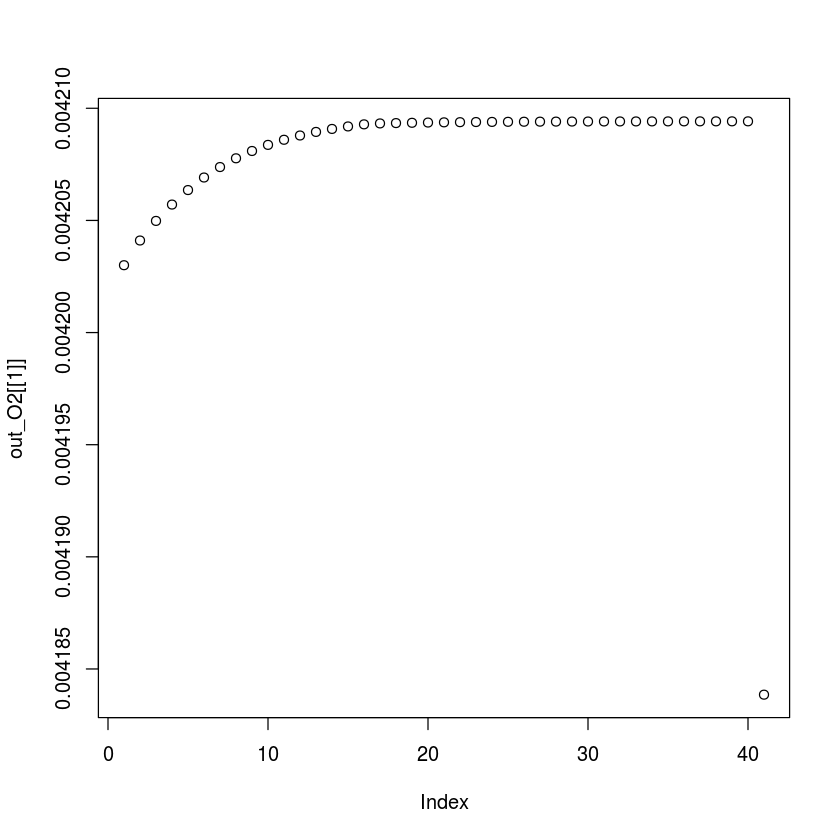

In [3]:
plot(out_O2[[1]])

What about the last point ?? How are the trajectories generated to have such final points ? The algorithm will detect here an accident whereas it seems to be a problem in the simulations

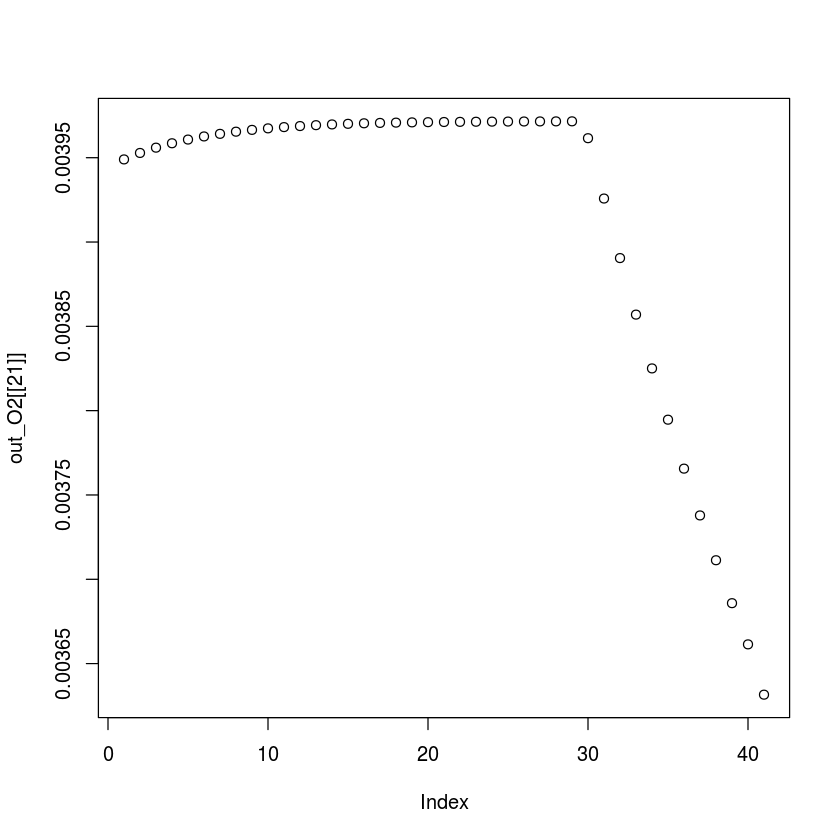

In [4]:
# A trajectory having an accident
plot(out_O2[[21]])

### Generation of the dataset with all the trajectories concatenated

In [5]:
data = out_O2[[1]]
cummean = cumsum(data) / seq(1, nb_t, 1)
cum_means = c(data[1], cummean[-1])

for (i in 2:nb_simu){
    data_simu = out_O2[[i]]
    data = c(data, data_simu)
    
    # Compute cumulated mean
    cummean = cumsum(data_simu) / seq(1, nb_t, 1)
    cummean = c(data_simu[1], cummean[-1]) # On décale d'un cran pour avoir les moyennes des (t-1) valeurs
    cum_means = c(cum_means, cummean)
}
data = data.frame(data)
colnames(data) = c("X")
data[['cum_mean']] = cum_means

# Add the information about beginning a new trajectory
one_trajec = c(1, rep(0, nb_t - 1))
data[['new_trajec']] = rep(one_trajec, nb_simu)

**The cumulated means computed :**

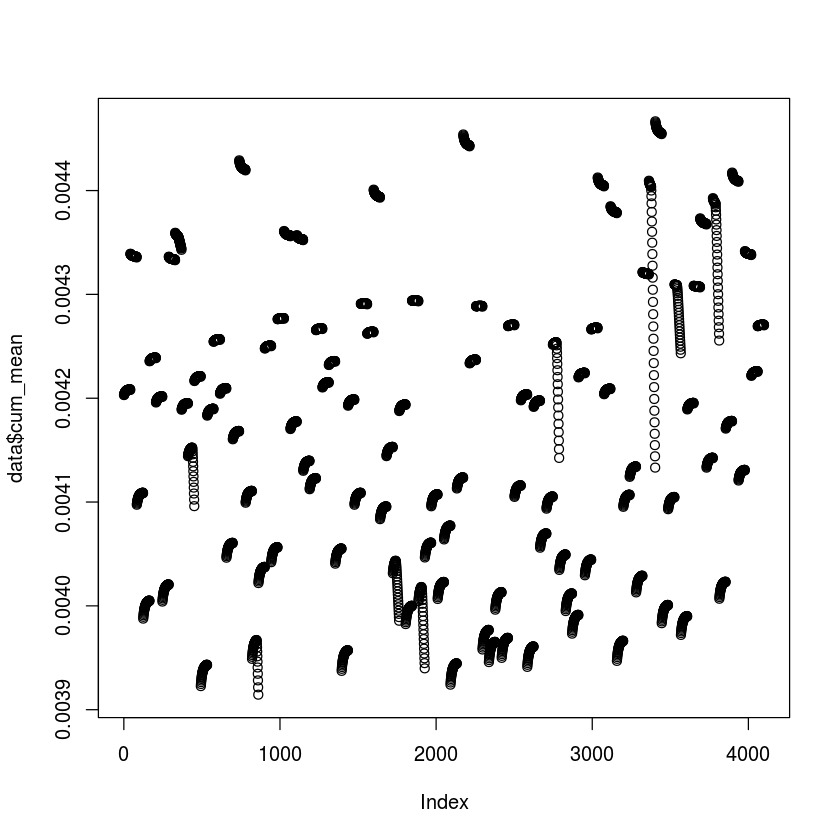

In [6]:
plot(data$cum_mean)

#### Difference between the cumulated mean and the value to choose a threshold to do an accident criterion 

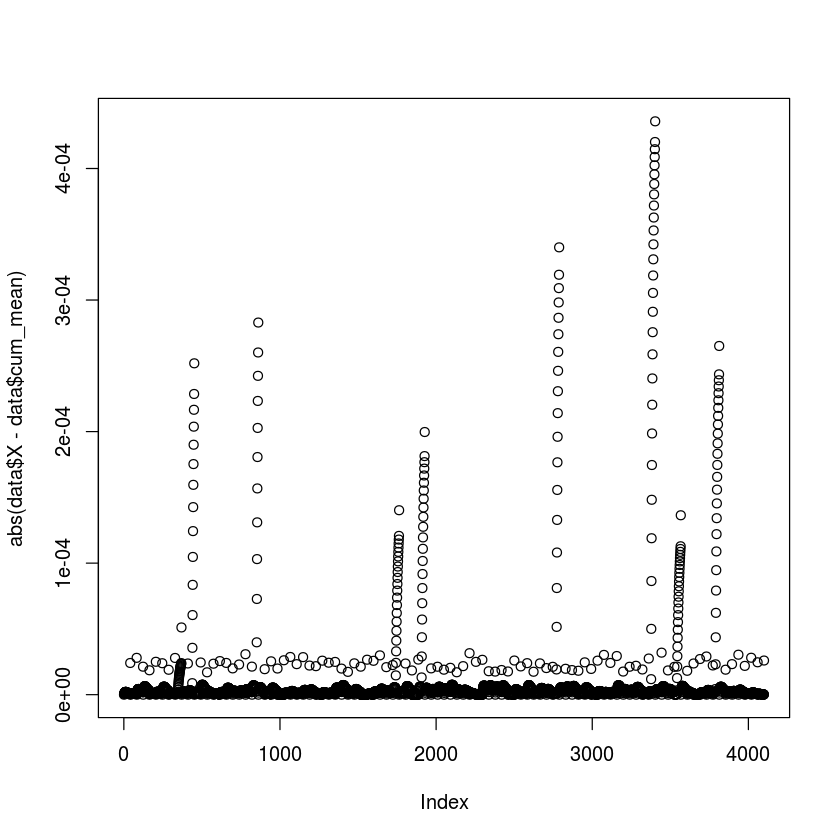

In [7]:
plot(abs(data$X - data$cum_mean))

## Accident criterion:
- |X(t) - CumMean(1 - (t-1))| > threshold\_mean **(Y1)**
- |X(t) - X_0| > threshold\_general **(Y2)**

In [53]:
thres_mean = 5e-5
X0 = 0.0042
thres_gal = 0.0004
data = transform(data, Y1 = ifelse(abs(X - cum_mean) > threshold_mean , 1, 0))
data = transform(data, Y2 = ifelse(abs(X - X0) > thres_gal , 1, 0))
data = transform(data, Y = ifelse(Y1 + Y2 >= 1 , 1, 0))

In [56]:
print(length(data[data$Y == 1,]$Y))
head(data[data$Y == 1,], 30)

[1] 142


,X,cum_mean,new_trajec,Y,Y2,Y1
369,0.004291825,0.004342929,0,1,0,1
440,0.004088230,0.004148758,0,1,0,1
441,0.004062487,0.004145975,0,1,0,1
442,0.004037894,0.004142598,0,1,0,1
443,0.004014361,0.004138712,0,1,0,1
444,0.003991811,0.004134391,0,1,0,1
445,0.003970173,0.004129699,0,1,0,1
446,0.003949386,0.004124691,0,1,0,1
447,0.003929396,0.004119412,0,1,0,1
448,0.003910154,0.004113906,0,1,0,1


# OnlineSuperLearner

In [61]:
data_train = subset(data, select = c('X', 'Y'))
print(length(data_train$X))
head(data_train)

[1] 4100


X,Y
0.004203003,0
0.004204104,0
0.004204978,0
0.004205707,0
0.004206353,0
0.004206912,0


In [62]:
training_set_size = length(data_train$X)

#data.train <- simulator$simulateWAY(training_set_size + B + 100, qw=llW, ga=llA, Qy=llY, verbose=log)
data.train.static <- OnlineSuperLearner::Data.Static$new(dataset = data)

Warning message:
“replacing previous import ‘R.utils::extract’ by ‘magrittr::extract’ when loading ‘OnlineSuperLearner’”Warning message:
“replacing previous import ‘R.oo::equals’ by ‘magrittr::equals’ when loading ‘OnlineSuperLearner’”Warning message:
“replacing previous import ‘R.oo::getClasses’ by ‘methods::getClasses’ when loading ‘OnlineSuperLearner’”Warning message:
“replacing previous import ‘R.oo::getMethods’ by ‘methods::getMethods’ when loading ‘OnlineSuperLearner’”

In [63]:
X <- OnlineSuperLearner::RandomVariable$new(formula = X ~ Y_lag_1, family = 'gaussian')
Y <- OnlineSuperLearner::RandomVariable$new(formula = Y ~ X, family = 'binomial')

variable_of_interest <- Y
randomVariables <- c(X, Y)

In [64]:
algos <- list()

algos <- append(algos, list(list(algorithm = 'ML.XGBoost',
                       algorithm_params = list(alpha = 0),
                       params = list(nbins = c(6,40), online = TRUE))))

algos <- append(algos, list(list(algorithm = 'condensier::speedglmR6',
                      #algorithm_params = list(),
                      params = list(nbins = c(3,4, 5), online = FALSE))))


In [65]:
# bounds <- OnlineSuperLearner::PreProcessor.generate_bounds(data.train.static)
# pre_processor <- PreProcessor$new(bounds = bounds)

In [66]:
smg_factory <- OnlineSuperLearner::SMGFactory$new()
summaryMeasureGenerator <- smg_factory$fabricate(randomVariables)

In [67]:
log <- FALSE
osl  <- OnlineSuperLearner::OnlineSuperLearner$new(algos, summaryMeasureGenerator = summaryMeasureGenerator,
                                                   verbose = log)

In [71]:
nb_iter = 10

risk <- osl$fit(data.train.static, randomVariables = randomVariables,
                initial_data_size = training_set_size / 2,
                max_iterations = nb_iter,
                mini_batch_size = (training_set_size / 2) / nb_iter)

Warning message in private$transform_parameters(weights[-length(weights)], epsilon = epsilon, :
“In WCC.NMBFGS some of the parameters turned out to be Inf, NaN or NA!”Warning message in private$transform_parameters(weights[-length(weights)], epsilon = epsilon, :
“In WCC.NMBFGS some of the parameters turned out to be Inf, NaN or NA!”

ERROR: Error in `[.data.table`(data.splitted$test, , outcome.variables, with = FALSE): column(s) not found: X, Y


In [72]:
risk

X,Y
0.03626348,1.35476
X,Y
-3.790561,1.35476
X,Y
-3.899977,0.1361545
X,Y
-3.945187,0.1361545
X,Y
-4.004081,0.1361545
X,Y


In [73]:
datas <- summaryMeasureGenerator$getNext(n = nb_t)

In [75]:
tau = 3
result = foreach(i=seq(nb_t), .combine=rbind) %do% {
        osl$sample_iteratively(data = data_train[i,],
                           randomVariables = randomVariables,
                           tau = tau)[tau, 'Y']
    }

result %<>% unlist


ERROR: Error in foreach(i = seq(nb_t), .combine = rbind) %do% {: could not find function "%do%"
